<a href="https://colab.research.google.com/github/ankitkr100/Projects/blob/main/Car_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit
import seaborn as sns
import numpy as np
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

The data is taken from Ammen Manna Github account

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ameenmanna8824/DATASETS/main/CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.shape

(205, 26)

In [ ]:
df.size

5330

In [ ]:
df.info

<bound method DataFrame.info of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible   

In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df['carbody'].nunique()

5

In [ ]:
Ctype = df.groupby('carbody',sort = False).size()
Ctype

carbody
convertible     6
hatchback      70
sedan          96
wagon          25
hardtop         8
dtype: int64

In [ ]:
Cbody = df['carbody'].unique()
Cbody

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

<BarContainer object of 5 artists>

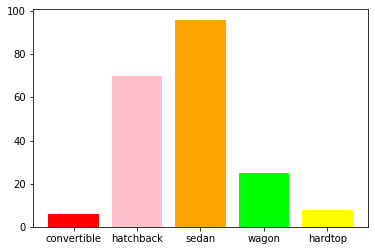

In [ ]:

plt.bar(Cbody,Ctype,color = ['Red','pink','orange','lime', 'Yellow'])

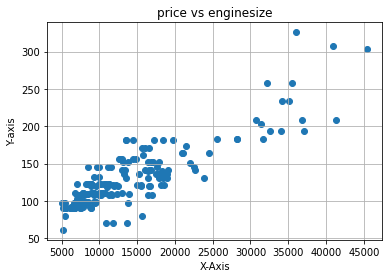

In [ ]:
import matplotlib.pyplot as plt
#plt.scatter(x-axis,y-axis)
plt.scatter(df['price'],df['enginesize'])
plt.title('price vs enginesize')
plt.xlabel('X-Axis')
plt.ylabel('Y-axis')
plt.grid()

In [ ]:
correlation = df.corr()

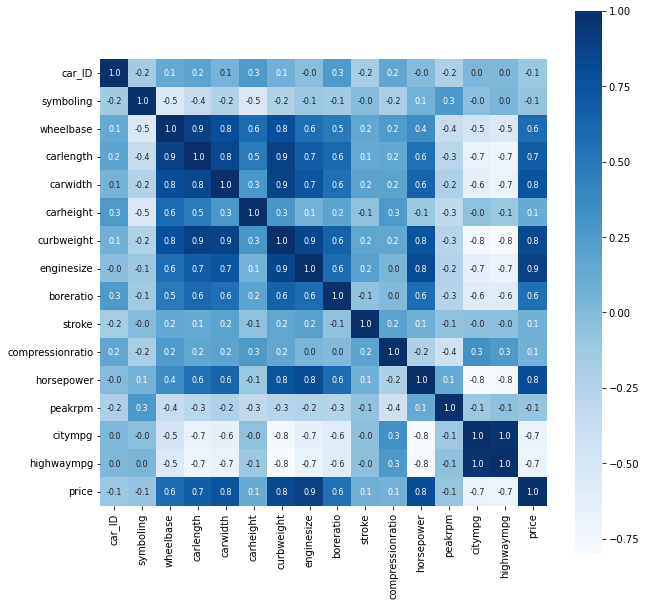

In [ ]:
#Construct a heat map to understand the correlation
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
X = df.drop(['fuelsystem', 'enginetype', 'cylindernumber', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation','fueltype','CarName','price'], axis = 1)
Y = df['price'] 

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
print(X)
print(Y)

     car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0         1          3       88.6      168.8      64.1       48.8        2548   
1         2          3       88.6      168.8      64.1       48.8        2548   
2         3          1       94.5      171.2      65.5       52.4        2823   
3         4          2       99.8      176.6      66.2       54.3        2337   
4         5          2       99.4      176.6      66.4       54.3        2824   
..      ...        ...        ...        ...       ...        ...         ...   
200     201         -1      109.1      188.8      68.9       55.5        2952   
201     202         -1      109.1      188.8      68.8       55.5        3049   
202     203         -1      109.1      188.8      68.9       55.5        3012   
203     204         -1      109.1      188.8      68.9       55.5        3217   
204     205         -1      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio 

Spliting the data into training data and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state= 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(205, 15) (184, 15) (21, 15)


Model Training

In [ ]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

Evaluation

Prediction on training data

In [ ]:
#Accuracy for prediction
training_data_prediction = model.predict(X_train)
print(training_data_prediction)

[ 6677.2234982  19585.1551382  18087.96727956 11128.76279909
  1229.40630484  5703.55593284  7513.74603558 13546.04950229
 18570.45610214  8963.29086288 13648.4393382   5628.02399874
 19409.95267212  6905.44056394 20179.1627905  18494.43818208
 20468.29052587  9002.07029904  9227.10326165 18003.32721074
 31686.0448686  18467.78893589  4735.52660143 10683.68848666
  8963.3773973   6522.59391417  8975.33498741  6290.12167571
 12669.74140383 31157.35508614 10716.49025304  8917.38125819
  8403.35788093 17217.29188379 15738.09923004 18309.76807999
 22117.0950967  13220.54376108 11154.02584562  6572.66595925
  9236.42922242  7217.28502622 16602.38866536 15434.23379322
  5429.74776916 14887.92874582 20226.93076306 19110.57808672
 11513.08253685 14254.69156978  5372.04836877  6596.48673603
 14676.41496739  8606.60850767  7403.62587526  9013.57320407
 14318.74312794  6801.20923635 12892.59858937 19211.33449206
  9962.61840973  8053.71979324 14846.39396196 15479.52915117
 10330.32519565 15806.73

In [ ]:
from sklearn import metrics

In [ ]:
score_1= metrics.r2_score(Y_train, training_data_prediction)

In [ ]:
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

In [ ]:
print("R squared error :", score_1)
print("Mean Absolute error :", score_2)

R squared error : 0.8653389512544651
Mean Absolute error : 2188.1674778739775


Visualize the actual price vs predicted price

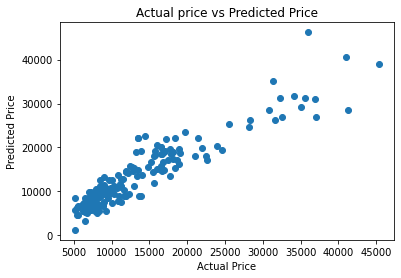

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted Price")
plt.show()

Test data prediction

In [ ]:
test_data_prediction = model.predict(X_test)
test_data_prediction

array([ 7372.77062361, 15593.57056016, 10532.02570796, 15437.52882293,
       16073.63491409,  6520.91081326, 17349.39481846, 15019.69056706,
        9258.33507992,  7474.70707285, 16269.53959136,  5893.49049486,
        8683.4879278 , 18157.31238108, 17627.79265509,  6581.1354805 ,
        5163.74157373,  8464.42205392, 26896.93845904,  7355.83137913,
        9131.43325565])

In [ ]:
score_1= metrics.r2_score(Y_test, test_data_prediction)

In [ ]:
print("R squared error :", score_1)

R squared error : 0.8652233887809105


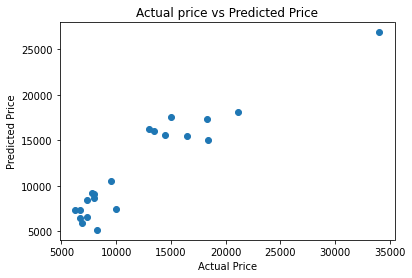

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted Price")
plt.show()

2. Lasso regression

In [ ]:
lass_reg_model = Lasso()
lass_reg_model.fit(X, Y)

Lasso()

In [ ]:
#Accuracy for prediction
test_data_prediction = lass_reg_model.predict(X_test)
print(test_data_prediction)

[ 7372.41758984 15597.47065577 10533.14869939 15422.67765633
 16066.6541712   6523.00814686 17334.13090059 15012.18067988
  9256.65532591  7484.78055749 16271.767546    5898.24560739
  8684.82683285 18159.89834893 17638.19988655  6581.61954346
  5168.51866182  8470.35629165 26885.99993731  7355.41107651
  9136.55666406]


In [ ]:
score_1= metrics.r2_score(Y_test, test_data_prediction)

In [ ]:
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [ ]:
print("R squared error :", score_1)
print("Mean Absolute error :", score_2)

R squared error : 0.864981688704349
Mean Absolute error : 1897.9716523652755


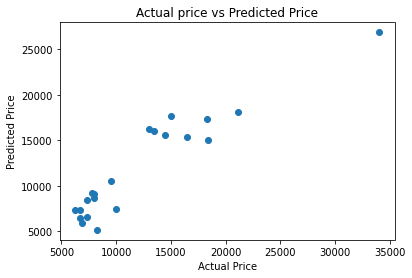

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted Price")
plt.show()

Accuracy of the model

In [ ]:
accuracy = model.score(X_test, Y_test)
print(accuracy*100, '%')

86.52233887809105 %
